# Quantitative Analysis for Pairs Trading: Co-Integration Approach

### Introduction

Pairs trading, a popular quantitative trading strategy, capitalizes on the historical relationships between pairs of stocks that tend to move together over time. By identifying these co-integrated stock pairs and leveraging deviations from their expected relationship, traders aim to generate profit. This project delves into the quantitative analysis of pairs trading, specifically focusing on the Co-Integration Approach, which employs advanced statistical techniques to identify and exploit co-integrated stock pairs.

### Collecting and Preparing Data

The foundation of any quantitative analysis lies in robust data collection and preparation. In this project, daily historical data on potentially co-related stocks is collected. The data includes stock prices, volumes, and other relevant metrics. This information serves as the basis for assessing the interplay between stocks and uncovering their co-movements. Employing sound data preprocessing practices is essential to ensure accurate and meaningful results.

### Eliminating Deterministic Components

Stock price data often includes deterministic components, such as trends and seasonality, that can obscure the underlying relationships between stocks. To extract the true co-movements, statistical tools are applied to eliminate these deterministic components. This step enhances the accuracy of subsequent analyses by revealing the genuine correlation between stocks, which is vital for effective pairs trading.

### Co-Integration Analysis and Trading Thresholds

Co-Integration Analysis is a cornerstone of this project. It involves detecting pairs of stocks that exhibit a stable, long-term relationship despite short-term fluctuations. Co-integration implies that the spread between stock prices reverts to a mean value over time. Through statistical methods, the co-integration relationship is established. The derived trading threshold, often based on spread analysis, defines the range within which traders execute buy and sell orders. This approach enables traders to capitalize on deviations from the established co-integrated relationship.

### Monte Carlo Simulations for Strategy Evaluation

The real-world performance of a trading strategy hinges on its ability to withstand various market scenarios. Monte Carlo Simulations are employed to evaluate the pairs trading strategy under different conditions, including varying levels of volatility, market trends, and economic events. By simulating numerous scenarios, this technique provides insights into the strategy's robustness and potential profitability. This evaluation informs traders about the strategy's viability in a dynamic and unpredictable market environment.

In summary, this project embarks on a comprehensive exploration of quantitative analysis for pairs trading using the Co-Integration Approach. Through meticulous data collection, preprocessing, Co-Integration Analysis, and Monte Carlo Simulations, the project aims to equip traders with insights into identifying co-integrated stock pairs and executing profitable pairs trading strategies. By delving into the intricacies of this approach, we unveil the synergy between advanced statistical techniques and quantitative finance to facilitate informed decision-making in the dynamic world of trading.

In [12]:
import pandas as pd
import os
import sys
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
os.chdir("C:\\Users\\User\\Desktop\\time sereis project")

In [4]:
sys.executable

'C:\\Program Files\\Python310\\python.exe'

## Some basic analysis of certain stocks:

In [5]:
hdfc = pd.read_excel('HDFC 2019-2022.xlsx', header = 0)
time_points = [i for i in range(len(hdfc['Close']))]
close_price = [hdfc['Close'][i] for i in range(len(hdfc['Close']))]
aligned_data = list(zip(time_points, close_price))
hdfc_close_price = pd.DataFrame(aligned_data, columns = ['Time points', 'Closing Price'])

In [6]:
sbi = pd.read_excel('SBI 2019-2022.xlsx', header = 0)
time_points = [i for i in range(len(sbi['Close']))]
close_price = [sbi['Close'][i] for i in range(len(sbi['Close']))]
aligned_data = list(zip(time_points, close_price))
sbi_close_price = pd.DataFrame(aligned_data, columns = ['Time points', 'Closing Price'])

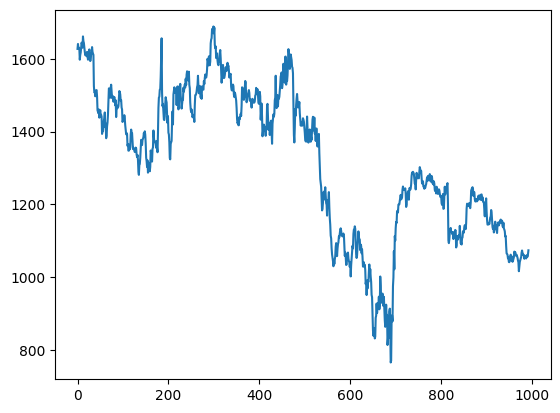

In [7]:
plt.plot(hdfc_close_price['Time points'], hdfc_close_price['Closing Price'])
plt.show()

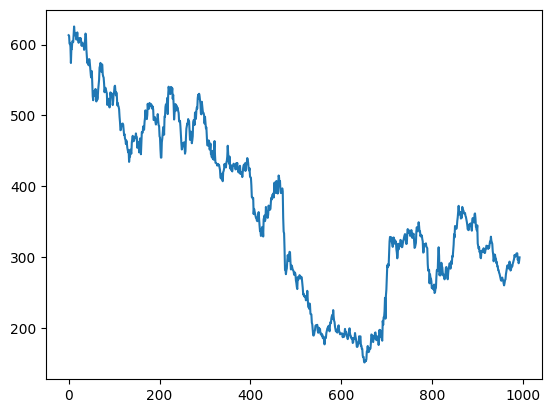

In [8]:
plt.plot(sbi_close_price['Time points'], sbi_close_price['Closing Price'])
plt.show()

In [9]:
ongc = pd.read_excel('ONGC 2019-2022.xlsx', header = 0)
time_points = [i for i in range(len(ongc['Close']))]
close_price = [ongc['Close'][i] for i in range(len(ongc['Close']))]
aligned_data = list(zip(time_points, close_price))
ongc_close_price = pd.DataFrame(aligned_data, columns = ['Time points', 'Closing Price'])

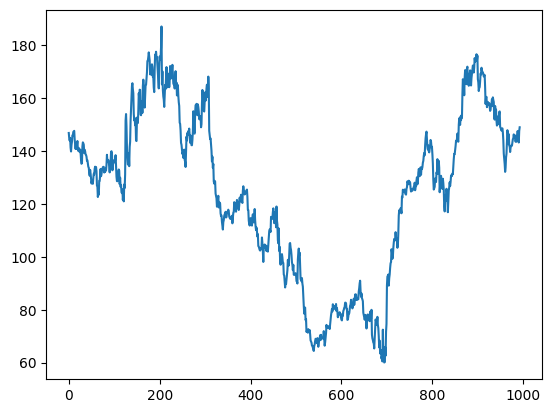

In [10]:
plt.plot(ongc_close_price['Time points'], ongc_close_price['Closing Price'])
plt.show()

## Time series plots

Text(0.5, 0, 'Date')

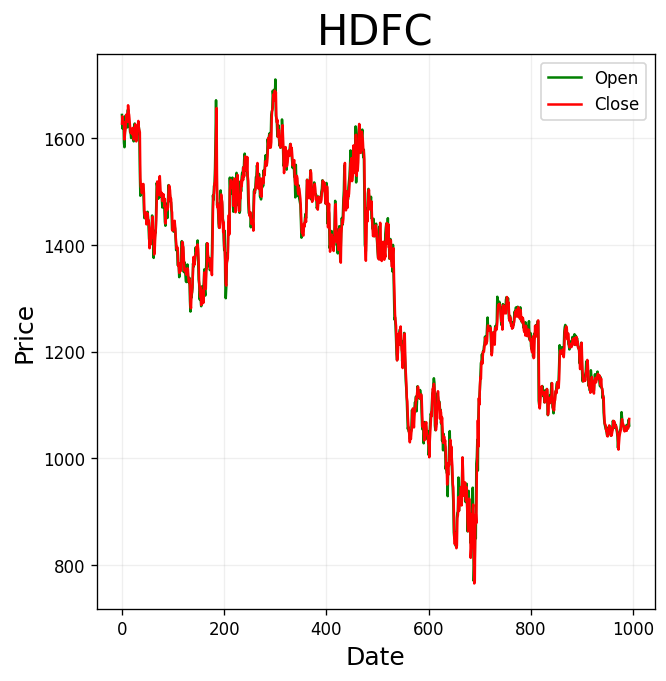

In [14]:
plt.figure(figsize = (6,6), dpi = 120)
sns.lineplot(hdfc.Open, color = 'green', label = 'Open')
sns.lineplot(hdfc.Close, color = 'red', label = 'Close')
plt.grid(alpha = 0.2)
plt.legend(loc='best')
plt.title('HDFC', fontsize = 25)
plt.ylabel('Price', fontsize = 15)
plt.xlabel('Date', fontsize = 15)

Text(0.5, 0, 'Date')

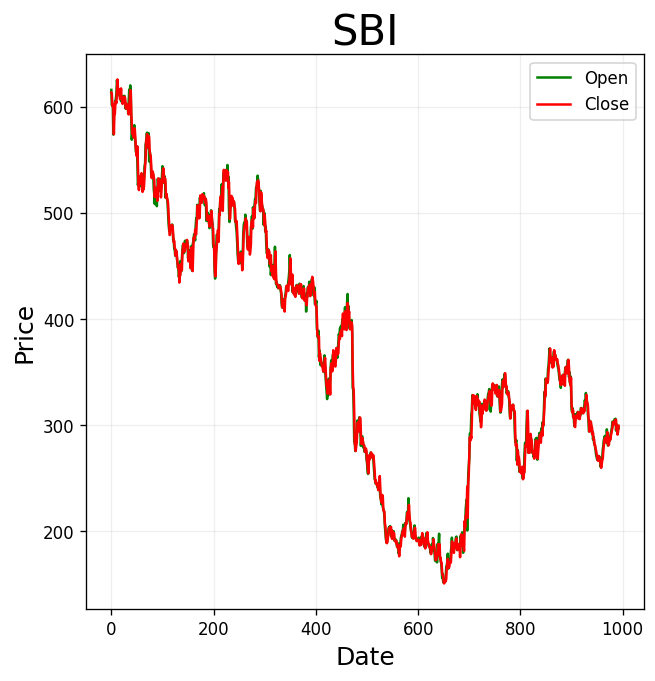

In [15]:
plt.figure(figsize = (6,6), dpi = 120)
sns.lineplot(sbi.Open, color = 'green', label = 'Open')
sns.lineplot(sbi.Close, color = 'red', label = 'Close')
plt.grid(alpha = 0.2)
plt.legend(loc='best')
plt.title('SBI', fontsize = 25)
plt.ylabel('Price', fontsize = 15)
plt.xlabel('Date', fontsize = 15)

Text(0.5, 0, 'Date')

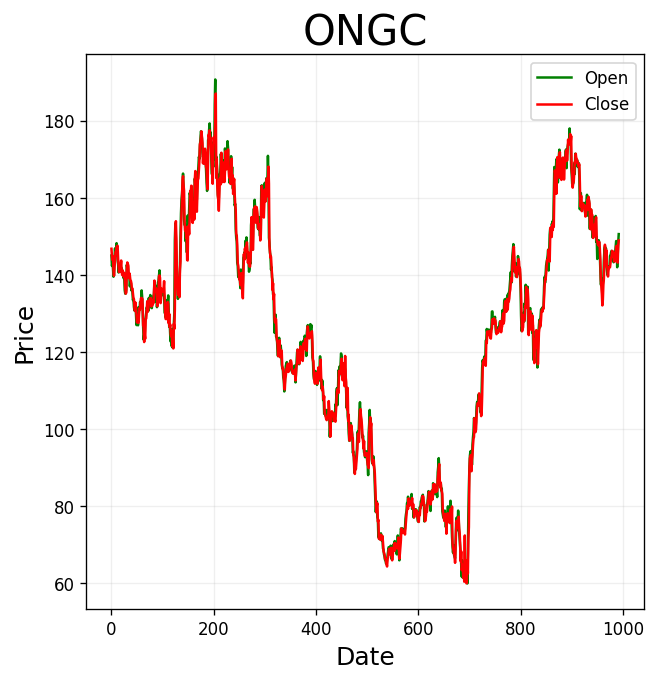

In [17]:
plt.figure(figsize = (6,6), dpi = 120)
sns.lineplot(ongc.Open, color = 'green', label = 'Open')
sns.lineplot(ongc.Close, color = 'red', label = 'Close')
plt.grid(alpha = 0.2)
plt.legend(loc='best')
plt.title('ONGC', fontsize = 25)
plt.ylabel('Price', fontsize = 15)
plt.xlabel('Date', fontsize = 15)

## Decomposition od deterministic components

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose as sdc

<Figure size 1800x1800 with 0 Axes>

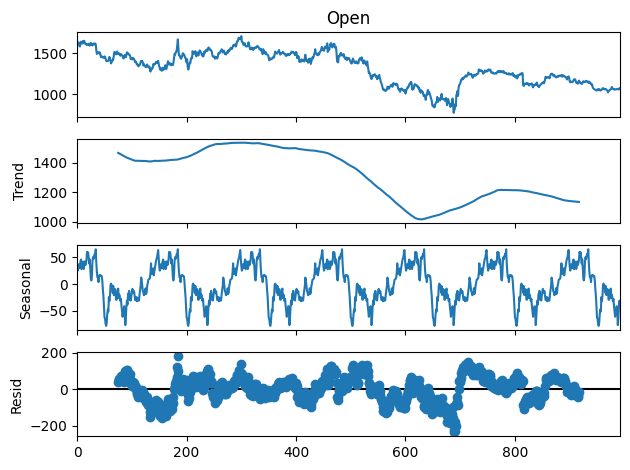

<Figure size 1800x1800 with 0 Axes>

In [20]:
res = sdc(hdfc.Open, model = 'additive', period = 150)
res.plot()
plt.figure(figsize = (15,15), dpi = 120)
